In [1]:
import pandas as pd
import numpy as np 
import datetime
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

# <span style='background:lightskyblue'> Nettoyage </span>


* Je vérifie l'unicité pour les futures jointures.

In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [3]:
customers.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

In [4]:
customers['sex'].unique()

array(['f', 'm'], dtype=object)

In [5]:
customers['birth'].unique()

array([1967, 1975, 1984, 1962, 1943, 1993, 1978, 1971, 1982, 1945, 2003,
       1959, 1977, 1954, 1987, 2000, 1992, 1963, 1958, 1994, 1936, 1986,
       1942, 1970, 1957, 1968, 2002, 2004, 1979, 1974, 1964, 1951, 1937,
       1981, 1965, 1960, 1996, 1983, 1990, 1955, 1988, 1991, 1972, 1980,
       1989, 1976, 1985, 1953, 1998, 1956, 1948, 1973, 1969, 1938, 1995,
       1952, 1949, 1999, 2001, 1939, 1950, 1966, 1935, 1941, 1961, 1997,
       1944, 1929, 1947, 1946, 1932, 1931, 1933, 1930, 1940, 1934],
      dtype=int64)

In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [7]:
products.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

In [8]:
products['categ'].unique()

array([0, 1, 2], dtype=int64)

In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [10]:
transactions.nunique()

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

In [11]:
transactions.sort_values(by='date')

,id_prod,date,session_id,client_id
480642,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
573155,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0


* Présence de dates test qui sont à supprimer.

In [12]:
test = transactions[transactions['id_prod']=="T_0"]
test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [13]:
test['session_id'].unique()

array(['s_0'], dtype=object)

In [14]:
test['client_id'].unique()

array(['ct_0', 'ct_1'], dtype=object)

* 200 lignes sont des phases de test. La date de lancement est d'ailleurs identique (2021-03-01).
* Ces lignes ne me sont pas utiles pour la suite donc je les supprime.

In [15]:
transactions.drop(transactions.loc[transactions['id_prod']=="T_0"].index, inplace=True)

* Je vérifie sur la table customers si il y a des lignes à supprimer en m'aidant des indications des phases test

In [16]:
test1 = customers[(customers['client_id']=='ct_0') | (customers['client_id']=='ct_1')]
test1

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


* Sachant que les "client_id" - ct_0 et ct_1 - sont liés à des phases de test, je vérifie qu'ils ne soient pas présents.
* On constate que ct_0 est lié au sexe féminin (née en 2001) et ct_1 au sexe masculin (née en 2001 également).
* Je décide de supprimer ces 2 valeurs qui ne seront pas utiles.

In [17]:
customers.drop(customers.loc[customers['client_id']=="ct_0"].index, inplace=True)

In [18]:
customers.drop(customers.loc[customers['client_id']=="ct_1"].index, inplace=True)

* Je vérifie dans la table "products" qu'aucune valeur ne soit rattachée à l'id_prod "T_0".

In [19]:
products[products["id_prod"]=="T_0"]

,id_prod,price,categ
731,T_0,-1.0,0


* C'est un prix négatif. L'id_prod est lié à une phase test. Je supprime aussi

In [20]:
products.drop(products.loc[products["id_prod"]=="T_0"].index, inplace=True)

# <span style='background:lightskyblue'> 1ère jointure </span>


In [21]:
merge1 = pd.merge(transactions, products, on='id_prod', how='outer', indicator=True)
merge1

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679348,0_1624,NaN,NaN,NaN,24.50,0.0,right_only
679349,2_86,NaN,NaN,NaN,132.36,2.0,right_only
679350,0_299,NaN,NaN,NaN,22.99,0.0,right_only
679351,0_510,NaN,NaN,NaN,23.66,0.0,right_only


* Je renomme la colonne "_merge" en "_merge1"

In [22]:
merge1.rename(columns = {'_merge':'_merge1'}, inplace = True) 

In [23]:
ro = merge1[merge1['_merge1']=='right_only'].index
ro

Int64Index([679332, 679333, 679334, 679335, 679336, 679337, 679338, 679339,
            679340, 679341, 679342, 679343, 679344, 679345, 679346, 679347,
            679348, 679349, 679350, 679351, 679352],
           dtype='int64')

In [24]:
merge1.drop(ro, inplace=True)

* Les 21 lignes sans "client_id" ont été supprimées.

# <span style='background:lightskyblue'> 2ème jointure </span>


In [25]:
merge2 = pd.merge(merge1, customers, on="client_id", how="inner")
merge2

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986
...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992


In [26]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     679332 non-null  object  
 1   date        679332 non-null  object  
 2   session_id  679332 non-null  object  
 3   client_id   679332 non-null  object  
 4   price       679111 non-null  float64 
 5   categ       679111 non-null  float64 
 6   _merge1     679332 non-null  category
 7   sex         679332 non-null  object  
 8   birth       679332 non-null  int64   
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 47.3+ MB


* Je convertis la date au format datetime.

In [27]:
merge2['date'] = pd.to_datetime(merge2['date'])

### Je souhaite avoir une colonne avec le mois et l'année (yyyy/mm)

In [28]:
merge2['ym-date'] = merge2['date'].dt.strftime('%Y-%m')

In [29]:
merge2.head(2)

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,2022-05
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,2021-07


### Je souhaite avoir une colonne avec la date au format (yyyy/mm/dd) sans l'heure

In [30]:
merge2['periode'] = merge2['date'].dt.date
merge2['temps'] = merge2['date'].dt.time

In [31]:
merge2.head(2)

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date,periode,temps
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,2022-05,2022-05-20,13:21:29.043970
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,2021-07,2021-07-20,13:21:29.043970


### Je souhaite avoir une colonne pour le mois et l'année (distinct)

In [32]:
merge2['Year'] = merge2['date'].dt.year 
merge2['Month'] = merge2['date'].dt.month 


In [33]:
merge2.head(2)

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date,periode,temps,Year,Month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,2022-05,2022-05-20,13:21:29.043970,2022,5
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,2021-07,2021-07-20,13:21:29.043970,2021,7


### Je souhaite avoir une colonne avec l'âge directement (et pas seulement l'année de naissance)

In [34]:
merge2['age'] = 2022- merge2['birth']

In [35]:
merge2.head(2)

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date,periode,temps,Year,Month,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,2022-05,2022-05-20,13:21:29.043970,2022,5,36
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,2021-07,2021-07-20,13:21:29.043970,2021,7,36


# <span style='background:lightskyblue'> 1) Moyenne mobile </span>


In [36]:
mm = merge2.groupby(by='ym-date').sum()
mm.head(2)

,price,categ,birth,Year,Month,age
ym-date,,,,,,
2021-03,482440.61,11806.0,56586044,57820810,85830,1263376
2021-04,476109.30,10623.0,56291346,57511597,113828,1248708


In [37]:
mm.reset_index(level=0, inplace=True) 

Text(0, 0.5, 'CA')

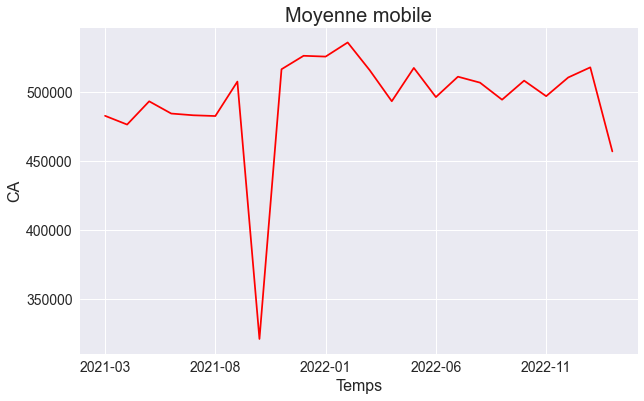

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

# line plot - the yearly average air temperature in Barcelona
mm.plot(color='red', figsize=(10,6), y='price', x='ym-date')

pltx = "Year"
plty='price'

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Moyenne mobile', fontsize=20)
plt.xlabel('Temps', fontsize=16)
plt.ylabel('CA', fontsize=16)


* Baisse du CA en octobre 2021

# <span style='background:lightskyblue'> 2) Évolution du CA </span>


In [39]:
merge2.head(1)

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date,periode,temps,Year,Month,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,2022-05,2022-05-20,13:21:29.043970,2022,5,36


In [40]:
ca = merge2.groupby(by='periode').sum()
ca.head(2)

,price,categ,birth,Year,Month,age
periode,,,,,,
2021-03-01,16565.22,427.0,1904339,1946223,2889,42847
2021-03-02,15486.45,362.0,1858984,1899740,2820,41696


In [41]:
ca.reset_index(level=0, inplace=True)

In [42]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

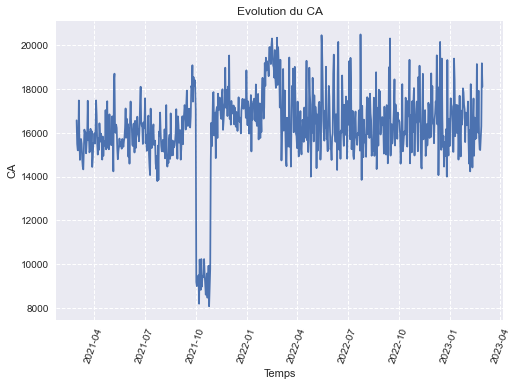

In [43]:
plt.title("Evolution du CA") 
plt.xlabel('Temps')                      
plt.ylabel('CA')
x = ca['periode']
y = ca['price']
plt.plot(x, y,) 
plt.xticks(rotation=70)
plt.grid(True,which="both", linestyle='--')

* On constate, au même titre que le graphique précedent (Moyenne mobile), une importante baisse de CA en octobre 2021.

# <span style='background:lightskyblue'> 3) Répartition du CA par client (courbe de Lorentz) </span>


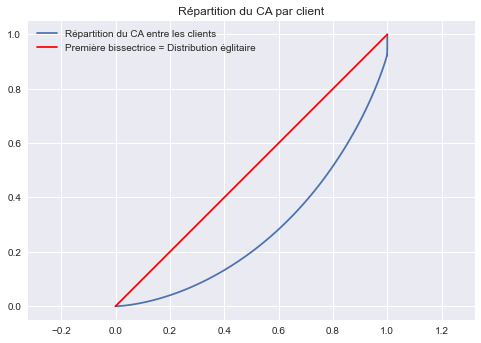

In [44]:
import numpy as np

caclient = merge2.groupby('client_id')['price'].sum()
dep = caclient.values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='Répartition du CA entre les clients')
plt.plot(xaxis,xaxis, color ='r', label = 'Première bissectrice = Distribution églitaire')
plt.title('Répartition du CA par client')
plt.legend()  
plt.show()

* Plus la courbe de Lorenz est proche de la première bissectrice, plus la répartition est égalitaire // ce qui n'est pas le cas ici
* L'indice de GINI mesure le niveau d'inégalité de la répartition d'une variable dans la population. Le coefficient varie de 0 (égalité parfaite) à 1 (inégalité parfaite)

In [45]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.44638654137401435

* Concernant notre courbe de Lorentz, on constate que 40% des clients représentent un peu moins de 20% du CA.

# <span style='background:lightskyblue'> 4) Les différentes requêtes </span> 

## A) Le lien entre le genre d’un client et les catégories des livres achetés

In [46]:
gcateg = merge2.groupby(['sex', 'categ']).count()
gcateg

id_prod    date  session_id  client_id   price  _merge1   birth  \
sex categ                                                                    
f   0.0     206103  206103      206103     206103  206103   206103  206103   
    1.0     114899  114899      114899     114899  114899   114899  114899   
    2.0      17283   17283       17283      17283   17283    17283   17283   
m   0.0     209356  209356      209356     209356  209356   209356  209356   
    1.0     112270  112270      112270     112270  112270   112270  112270   
    2.0      19200   19200       19200      19200   19200    19200   19200   

           ym-date  periode   temps    Year   Month     age  
sex categ                                                    
f   0.0     206103   206103  206103  206103  206103  206103  
    1.0     114899   114899  114899  114899  114899  114899  
    2.0      17283    17283   17283   17283   17283   17283  
m   0.0     209356   209356  209356  209356  209356  209356  
    1.0     112270   112270  112270  112270  112270  112270  
    2.0      19200    19200   19200   19200   19200   19200

In [47]:
gcateg.reset_index(level=0, inplace=True) 

In [48]:
gcateg

,sex,id_prod,date,session_id,client_id,price,_merge1,birth,ym-date,periode,temps,Year,Month,age
categ,,,,,,,,,,,,,,
0.0,f,206103,206103,206103,206103,206103,206103,206103,206103,206103,206103,206103,206103,206103
1.0,f,114899,114899,114899,114899,114899,114899,114899,114899,114899,114899,114899,114899,114899
2.0,f,17283,17283,17283,17283,17283,17283,17283,17283,17283,17283,17283,17283,17283
0.0,m,209356,209356,209356,209356,209356,209356,209356,209356,209356,209356,209356,209356,209356
1.0,m,112270,112270,112270,112270,112270,112270,112270,112270,112270,112270,112270,112270,112270
2.0,m,19200,19200,19200,19200,19200,19200,19200,19200,19200,19200,19200,19200,19200


Text(0, 0.5, 'Unité vendue')

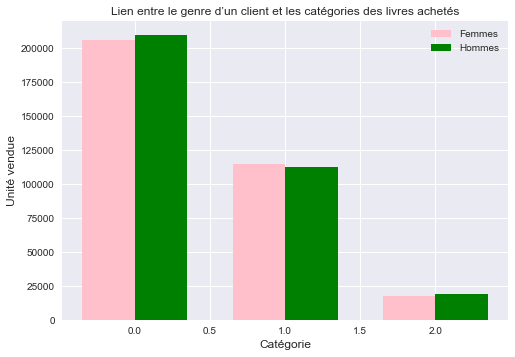

In [49]:
categ = ["0", "1", "2"]
nfemme = [206103, 114899, 17283]
nhomme = [209356, 112270, 19200]


# Position sur l'axe des x pour chaque étiquette
position = np.arange(len(categ))
# Largeur des barres
largeur = .35

# Création de la figure et d'un set de sous-graphiques
fig, ax = plt.subplots()
plt.title('Lien entre le genre d’un client et les catégories des livres achetés')
r1 = ax.bar(position - largeur/2, nfemme, largeur, color = "pink", label="Femmes")
r2 = ax.bar(position + largeur/2, nhomme, largeur, color = 'green', label="Hommes")
plt.legend()
plt.ylim([0, 220000])
plt.xlabel('Catégorie',fontsize = 12)
plt.ylabel('Unité vendue', fontsize = 12)

* Les femmes semblent acheter plus de livres appartenant à la catégorie 1.
* Tandis que les hommes semblent acheter légèrement plus de livres appartenant à la catégorie 0 et 2

## B ) Le lien entre l’âge des clients et le montant total des achats

In [50]:
amontant = merge2.groupby(by='age').sum()
amontant

,price,categ,birth,Year,Month
age,,,,,
18,609013.69,17743.0,30358596,30626706,96020
19,178195.78,5246.0,8755113,8836751,27687
20,184177.35,5413.0,9183174,9273439,29658
21,178497.70,5006.0,8508252,8596264,27359
22,165007.98,4970.0,8830000,8925739,27756
...,...,...,...,...,...
89,5254.35,185.0,632091,661100,2055
90,5043.19,181.0,600852,628739,1955
91,2815.45,95.0,328270,343683,995


In [51]:
amontant.reset_index(level=0, inplace=True) 

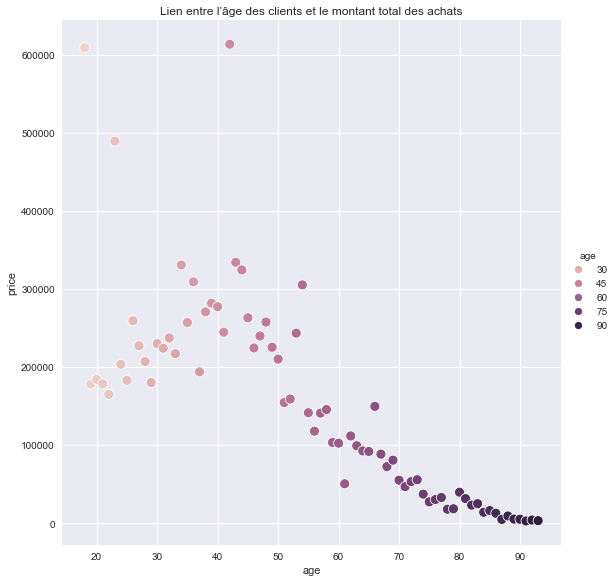

In [52]:
import matplotlib.pyplot as plt

x = amontant['age']
y = amontant['price']
sns.relplot(x='age' ,y="price",hue="age",data=amontant,height=8,s=100) 
plt.title("Lien entre l’âge des clients et le montant total des achats")
plt.show()

* Il seble que plus les clients soient âgés, moins le montant total soit important
* Il semble que la catégorie des 30-45 soit la tranche d'âge où le coup total est le plus important
* On notera toutefois que la catégorie des 18 ans est la catégorie faisant le plus d'achat, juste après la catégorie des 42 ans.
* Cette sureprésentation de la catégorie des "18 ans", cela peut s'expliquer car il faut fournir un âge minimum pour acheter sur un site internet : il faut être majeur.

# C) Le lien entre l'âge et la fréquence d’achat

In [57]:
merge2.head()

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date,periode,temps,Year,Month,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,2022-05,2022-05-20,13:21:29.043970,2022,5,36
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,2021-07,2021-07-20,13:21:29.043970,2021,7,36
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,2022-08,2022-08-20,13:21:29.043970,2022,8,36
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,2022-06,2022-06-18,01:49:37.823274,2022,6,36
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,2021-08,2021-08-18,01:49:37.823274,2021,8,36


In [58]:
afre = merge2.groupby(['age','ym-date']).count()
afre

id_prod  date  session_id  client_id  price  categ  _merge1  sex  \
age ym-date                                                                     
18  2021-03      596   596         596        596    596    596      596  596   
    2021-04      581   581         581        581    581    581      581  581   
    2021-05      646   646         646        646    646    646      646  646   
    2021-06      645   645         645        645    645    645      645  645   
    2021-07      683   683         683        683    683    683      683  683   
...              ...   ...         ...        ...    ...    ...      ...  ...   
93  2022-10       10    10          10         10     10     10       10   10   
    2022-11       15    15          15         15     15     15       15   15   
    2022-12       13    13          13         13     13     13       13   13   
    2023-01       14    14          14         14     14     14       14   14   
    2023-02        9     9           9          9      9      9        9    9   

             birth  periode  temps  Year  Month  
age ym-date                                      
18  2021-03    596      596    596   596    596  
    2021-04    581      581    581   581    581  
    2021-05    646      646    646   646    646  
    2021-06    645      645    645   645    645  
    2021-07    683      683    683   683    683  
...            ...      ...    ...   ...    ...  
93  2022-10     10       10     10    10     10  
    2022-11     15       15     15    15     15  
    2022-12     13       13     13    13     13  
    2023-01     14       14     14    14     14  
    2023-02      9        9      9     9      9  

[1824 rows x 13 columns]

In [60]:
afre.reset_index(level=0, inplace=True)

In [61]:
frequence = afre['id_prod']/30


new_afre=afre.assign(frequence=frequence)
new_afre

,ym-date,age,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,periode,temps,Year,Month,frequence
0,2021-03,18,596,596,596,596,596,596,596,596,596,596,596,596,596,19.866667
1,2021-04,18,581,581,581,581,581,581,581,581,581,581,581,581,581,19.366667
2,2021-05,18,646,646,646,646,646,646,646,646,646,646,646,646,646,21.533333
3,2021-06,18,645,645,645,645,645,645,645,645,645,645,645,645,645,21.500000
4,2021-07,18,683,683,683,683,683,683,683,683,683,683,683,683,683,22.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2022-10,93,10,10,10,10,10,10,10,10,10,10,10,10,10,0.333333
1820,2022-11,93,15,15,15,15,15,15,15,15,15,15,15,15,15,0.500000
1821,2022-12,93,13,13,13,13,13,13,13,13,13,13,13,13,13,0.433333
1822,2023-01,93,14,14,14,14,14,14,14,14,14,14,14,14,14,0.466667


In [63]:
frequence1 = new_afre.groupby(by='age').mean()
frequence1

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,periode,temps,Year,Month,frequence
age,,,,,,,,,,,,,,
18,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,21.040278
19,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,6.070833
20,191.125000,191.125000,191.125000,191.125000,191.000000,191.000000,191.125000,191.125000,191.125000,191.125000,191.125000,191.125000,191.125000,6.370833
21,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,5.905556
22,183.958333,183.958333,183.958333,183.958333,183.875000,183.875000,183.958333,183.958333,183.958333,183.958333,183.958333,183.958333,183.958333,6.131944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,13.625000,13.625000,13.625000,13.625000,13.583333,13.583333,13.625000,13.625000,13.625000,13.625000,13.625000,13.625000,13.625000,0.454167
90,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,0.431944
91,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,0.236111


In [64]:
frequence1.reset_index(level=0, inplace=True)

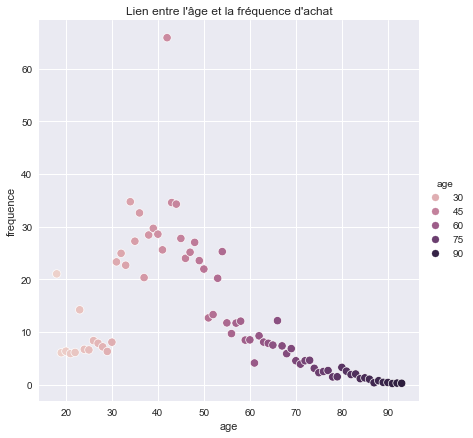

In [65]:
import matplotlib.pyplot as plt

x = frequence1['age']
y = frequence1['frequence']
sns.relplot(x='age' ,y= 'frequence',hue="age",data=frequence1,height=6,s=70) 
plt.title("Lien entre l'âge et la fréquence d'achat")
plt.show()

* Les 30-40 ans sont la catégorie avec la fréquence d'achat la plus élevée.
* Avec un pic notable pour la catégorie des 42 ans.
* A partir de 50 ans, plus les clients sont âgés, plus la fréquence d'achat est faible.

## D) Le lien entre l'âge et les catégories des livres achetés

In [66]:
acateg.reset_index(level=0, inplace=True) 

In [67]:
acateg

,categ,age,id_prod,date,session_id,client_id,price,_merge1,sex,birth,ym-date,periode,temps,Year,Month
0,0.0,18,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418
1,1.0,18,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719
2,2.0,18,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012
3,0.0,19,909,909,909,909,909,909,909,909,909,909,909,909,909
4,1.0,19,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1.0,92,149,149,149,149,149,149,149,149,149,149,149,149,149
224,2.0,92,2,2,2,2,2,2,2,2,2,2,2,2,2
225,0.0,93,78,78,78,78,78,78,78,78,78,78,78,78,78
226,1.0,93,122,122,122,122,122,122,122,122,122,122,122,122,122


In [68]:
categ0= acateg.loc[acateg.categ == 0]
categ0

,categ,age,id_prod,date,session_id,client_id,price,_merge1,sex,birth,ym-date,periode,temps,Year,Month
0,0.0,18,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418
3,0.0,19,909,909,909,909,909,909,909,909,909,909,909,909,909
6,0.0,20,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016
9,0.0,21,974,974,974,974,974,974,974,974,974,974,974,974,974
12,0.0,22,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.0,89,142,142,142,142,142,142,142,142,142,142,142,142,142
216,0.0,90,132,132,132,132,132,132,132,132,132,132,132,132,132
219,0.0,91,77,77,77,77,77,77,77,77,77,77,77,77,77
222,0.0,92,75,75,75,75,75,75,75,75,75,75,75,75,75


In [69]:
categ1= acateg.loc[acateg.categ == 1]
categ1

,categ,age,id_prod,date,session_id,client_id,price,_merge1,sex,birth,ym-date,periode,temps,Year,Month
1,1.0,18,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719
4,1.0,19,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678
7,1.0,20,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723
10,1.0,21,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550
13,1.0,22,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1.0,89,183,183,183,183,183,183,183,183,183,183,183,183,183
217,1.0,90,177,177,177,177,177,177,177,177,177,177,177,177,177
220,1.0,91,91,91,91,91,91,91,91,91,91,91,91,91,91
223,1.0,92,149,149,149,149,149,149,149,149,149,149,149,149,149


In [70]:
categ2= acateg.loc[acateg.categ == 2]
categ2

,categ,age,id_prod,date,session_id,client_id,price,_merge1,sex,birth,ym-date,periode,temps,Year,Month
2,2.0,18,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012
5,2.0,19,1784,1784,1784,1784,1784,1784,1784,1784,1784,1784,1784,1784,1784
8,2.0,20,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845,1845
11,2.0,21,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
14,2.0,22,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671,1671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2.0,89,1,1,1,1,1,1,1,1,1,1,1,1,1
218,2.0,90,2,2,2,2,2,2,2,2,2,2,2,2,2
221,2.0,91,2,2,2,2,2,2,2,2,2,2,2,2,2
224,2.0,92,2,2,2,2,2,2,2,2,2,2,2,2,2


<BarContainer object of 76 artists>

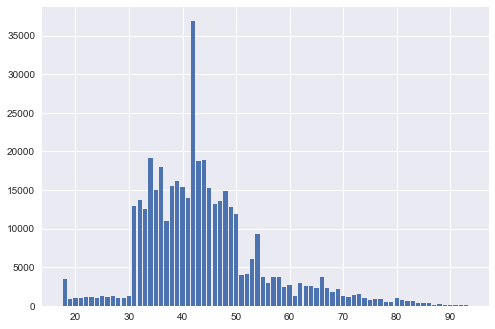

In [71]:
import matplotlib.pyplot as plt

names0 = categ0['age'] # nom des barres

values0 = categ0['id_prod']

plt.bar(names0, values0) 

<BarContainer object of 76 artists>

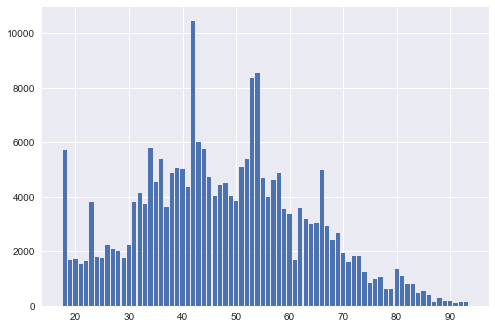

In [72]:
import matplotlib.pyplot as plt

names1 = categ1['age'] # nom des barres

values1 = categ1['id_prod']

plt.bar(names1, values1) 

<BarContainer object of 76 artists>

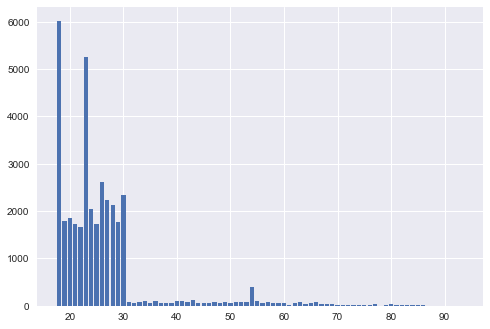

In [73]:
import matplotlib.pyplot as plt

names2 = categ2['age'] # nom des barres

values2 = categ2['id_prod']

plt.bar(names2, values2) 

In [74]:
agg_tips = merge2.groupby(['age', 'categ'])['id_prod'].count().unstack().fillna(0)
agg_tips

categ,0.0,1.0,2.0
age,,,
18,3418,5719,6012
19,909,1678,1784
20,1016,1723,1845
21,974,1550,1728
22,1114,1628,1671
...,...,...,...
89,142,183,1
90,132,177,2
91,77,91,2


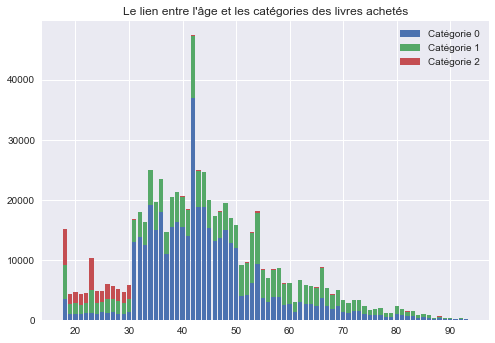

<Figure size 2880x2160 with 0 Axes>

In [75]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plt.figure(figsize=(40,30))
ax.bar(agg_tips.index, agg_tips[0.0], label='Catégorie 0')
ax.bar(agg_tips.index, agg_tips[1.0], bottom=agg_tips[0.0],
       label='Catégorie 1')
ax.bar(agg_tips.index, agg_tips[2.0], bottom=agg_tips[1.0]+agg_tips[0.0],
       label='Catégorie 2')

ax.set_title("Le lien entre l'âge et les catégories des livres achetés")
ax.legend()


# E) Le lien entre l'âge et la taille du panier moyen

In [77]:
amoyen = merge2.groupby('age').mean()
amoyen

,price,categ,birth,Year,Month
age,,,,,
18,40.201577,1.171232,2004.0,2021.698198,6.338372
19,40.767737,1.200183,2003.0,2021.677191,6.334248
20,40.178305,1.180846,2002.0,2021.678439,6.465664
21,41.979704,1.177328,2001.0,2021.698965,6.434384
22,37.391339,1.126218,2000.0,2021.684938,6.286750
...,...,...,...,...,...
89,16.117638,0.567485,1933.0,2021.712538,6.284404
90,16.216045,0.581994,1932.0,2021.668810,6.286174
91,16.561471,0.558824,1931.0,2021.664706,5.852941


In [78]:
amoyen.reset_index(level=0, inplace=True) 

In [79]:
amoyen

,age,price,categ,birth,Year,Month
0,18,40.201577,1.171232,2004.0,2021.698198,6.338372
1,19,40.767737,1.200183,2003.0,2021.677191,6.334248
2,20,40.178305,1.180846,2002.0,2021.678439,6.465664
3,21,41.979704,1.177328,2001.0,2021.698965,6.434384
4,22,37.391339,1.126218,2000.0,2021.684938,6.286750
...,...,...,...,...,...,...
71,89,16.117638,0.567485,1933.0,2021.712538,6.284404
72,90,16.216045,0.581994,1932.0,2021.668810,6.286174
73,91,16.561471,0.558824,1931.0,2021.664706,5.852941
74,92,17.760487,0.676991,1930.0,2021.650442,7.004425


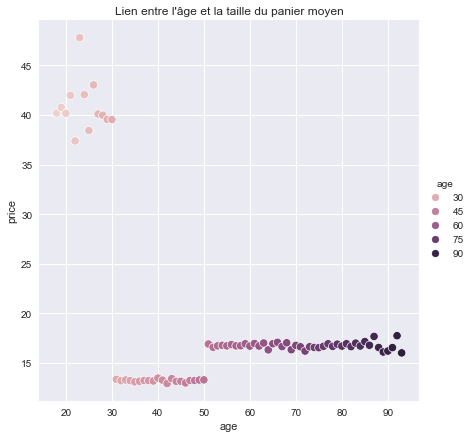

In [80]:
import matplotlib.pyplot as plt

x = amoyen['age']
y = amoyen['price']
sns.relplot(x='age' ,y="price",hue="age",data=amoyen,height=6,s=70) 
plt.title("Lien entre l'âge et la taille du panier moyen")
plt.show()

* 3 Groupes tendances semblent se démarquer : 
    - Les - 30 ans ont le panier moyen le plus important (compris entre 37 et 48 euros)
    - Les clients entre 30 ans et 50 ans ont un panier moyen de 13 eurps
    - Enfin, les clients en 50 et 93 ans ont un panier moyen entre 16 euros et 25 euros)

# REPARTITION CA HOMME/FEMME


In [81]:
hf = merge2.groupby(by="sex").agg('price').sum()
hf

sex
f    5859683.13
m    5994045.55
Name: price, dtype: float64

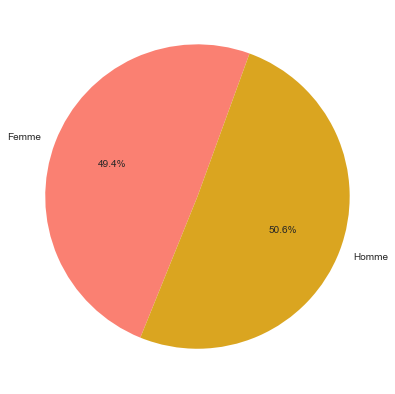

In [82]:
from matplotlib import pyplot as plt 
import numpy as np 
  
noms = ['Femme', 'Homme'] 
  
data = hf 
colors = ['salmon', 'goldenrod']
fig = plt.figure(figsize =(10, 7)) 
plt.pie(hf, labels = noms, colors = colors,autopct='%1.1f%%', startangle=70) 
  
plt.show() 

* Les hommes sontlégèrement plus nombreux à acheter sur le site

# REPARTITION CA PAR CATEGORIE

In [83]:
tricateg = merge2.groupby(by='categ').sum().sort_values(by='price')
tricateg 

,price,birth,Year,Month,age
categ,,,,,
2.0,2780275.02,72821964,73757197,230761,946662
0.0,4419730.97,821820509,839913437,2722842,18237589
1.0,4653722.69,448510834,459268043,1463595,10824884


In [84]:
tricateg.reset_index(level=0, inplace=True)

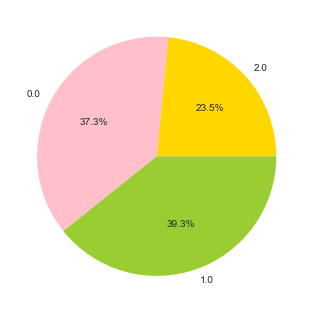

In [85]:
import matplotlib.pyplot as plt

labels = tricateg['categ']
colors = ['gold', 'pink', 'yellowgreen']
ann = tricateg['price']
  
plt.pie(ann, labels = labels, colors=colors, autopct='%1.1f%%')
plt.show()

* La catégorie 1 est la catégorie la plus vendue.

# REPARTITION CA PAR ANNEE

In [86]:
annee = merge2.groupby(by="Year").agg('price').sum()
annee

Year
2021    4770826.56
2022    6108681.81
2023     974220.31
Name: price, dtype: float64

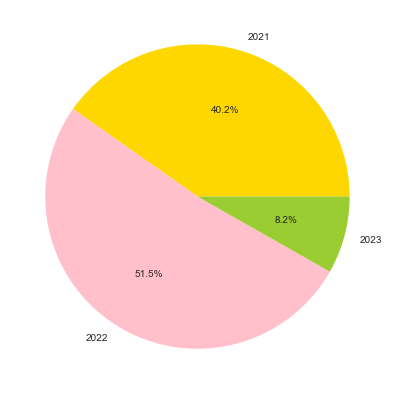

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import math

nom = ['2021','2022','2023'] 
colors = ['gold', 'pink', 'yellowgreen']
data = annee
  
fig = plt.figure(figsize =(10, 7)) 
plt.pie(annee, labels = nom, colors=colors, autopct='%1.1f%%')
  
plt.show() 

* L'année 2022 est pour le moment, l'année avec le meilleur CA.

# Top et Flop 

In [88]:
topflop = merge2.groupby(['id_prod']).count()
topflop

,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date,periode,temps,Year,Month,age
id_prod,,,,,,,,,,,,,,
0_0,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
0_1,487,487,487,487,487,487,487,487,487,487,487,487,487,487
0_10,22,22,22,22,22,22,22,22,22,22,22,22,22,22
0_100,3,3,3,3,3,3,3,3,3,3,3,3,3,3
0_1000,432,432,432,432,432,432,432,432,432,432,432,432,432,432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_95,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2_96,598,598,598,598,598,598,598,598,598,598,598,598,598,598
2_97,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [89]:
topflop.reset_index(level=0, inplace=True)

In [90]:
ordo = topflop.sort_values(by='session_id', ascending=False)
ordotop = ordo.head(5)
ordotop

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date,periode,temps,Year,Month,age
2592,1_369,2252,2252,2252,2252,2252,2252,2252,2252,2252,2252,2252,2252,2252,2252
2645,1_417,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189
2642,1_414,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180
2734,1_498,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128
2654,1_425,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096


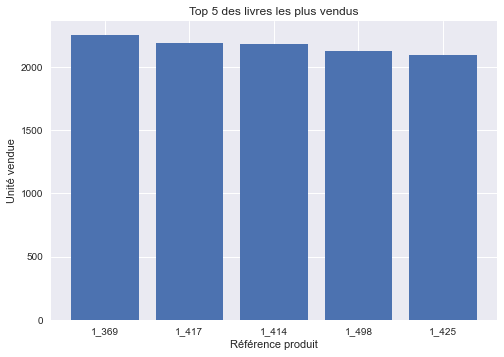

In [91]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
x = ordotop['id_prod']
y = ordotop['price']

# Create bars
plt.title('Top 5 des livres les plus vendus')
plt.bar(x, y)
plt.xlabel('Référence produit')
plt.ylabel('Unité vendue')


# Show graphic
plt.show()

* Les 5 livres les plus vendus appartiennent à la catégorie 1

In [92]:
ordoflop = ordo.tail(5)
ordoflop

,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,ym-date,periode,temps,Year,Month,age
313,0_1284,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1793,0_549,1,1,1,1,1,1,1,1,1,1,1,1,1,1
549,0_1498,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1785,0_541,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2167,0_886,1,1,1,1,1,1,1,1,1,1,1,1,1,1


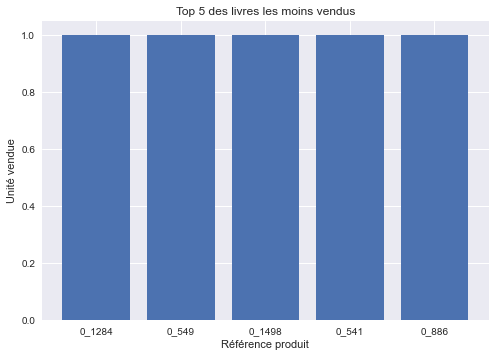

In [93]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
xf = ordoflop['id_prod']
yf = ordoflop['price']

# Create bars
plt.title('Top 5 des livres les moins vendus')
plt.bar(xf, yf)
plt.xlabel('Référence produit')
plt.ylabel('Unité vendue')


# Show graphic
plt.show()

* Les 5  références les moins vendues appartiennent à la catégorie 0 (seulement 1 unité vendue).

# <span style='background:lightskyblue'> Les tests statistiques </span>


## <span style='background:gold'> A) Le lien entre le genre d’un client et les catégories des livres achetés </span>


* Nous avons 2 variables qualitatives à savoir le genre (h/f) et la catégorie de livre (3) 
* Nous utilisons donc un test de CHI2
* Ce test permet de vérifier l'absence de lien statistique entre deux variables X et Y. Les deux sont dites indépendantes lorsqu'il n'existe aucun lien statistique entre elles, dit autrement, la connaissance de X ne permet en aucune manière de se prononcer sur Y. L'hypothèse nulle (H0) de ce test est la suivante : les deux variables X et Y sont indépendantes.
* En termes de valeur p, l'hypothèse nulle est généralement rejetée lorsque p ≤ 0,05.

* Existe t-il un lien entre le genre d'un client et la catégorie de livre qu'il achète ?
        - H0 = Il ne semble pas exister de lien entre le genre du client et la catégorie de livre acheté

In [94]:
X = "sex"
Y = "categ"
cont = merge2[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

categ,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


In [95]:
from scipy.stats import chi2_contingency as chi2_contingency

khi2, pval , ddl , contingent_theorique = chi2_contingency(cont)


In [96]:
print(pval)

1.1310980597090762e-32


### <span style='background:lightsalmon'> Nous constatons que la pvalue est inférieure à 0.05 donc nous pouvons rejetter l'hypothèse nulle. </span>
### <span style='background:lightsalmon'> Ainsi, il semble exister un lien entre le genre d'un client et la catégorie de livre acheté. </span>

## <span style='background:gold'> B) Le lien entre l’âge des clients et le montant total des achats </span>


* Nous avons 2 variables quantitatives à savoir l'âge des clients et le montant total des achats
* Pour les variables quantitatives,  la question préalable à se poser est de savoir si la distribution des variables suit une loi normale ou non. Pour cela, il faut utiliser le test de Kolmogorov-Smirnov. Si la pvalue est inférieure à 0.05, la variable ne suit pas la loi normale.
 - Dans le cas où les deux variables suivent la loi normale, nous utiliserons un test-paramétrique : Pearson
 - Dans le cas contraire, si l'une des deux variables ou les deux ne suivent pas la loi normale, nous utiliserons un test non-paramétrique : Spearman

### L'âge et le montant total suivent-ils une loi normale ?

In [97]:
amontant

,age,price,categ,birth,Year,Month
0,18,609013.69,17743.0,30358596,30626706,96020
1,19,178195.78,5246.0,8755113,8836751,27687
2,20,184177.35,5413.0,9183174,9273439,29658
3,21,178497.70,5006.0,8508252,8596264,27359
4,22,165007.98,4970.0,8830000,8925739,27756
...,...,...,...,...,...,...
71,89,5254.35,185.0,632091,661100,2055
72,90,5043.19,181.0,600852,628739,1955
73,91,2815.45,95.0,328270,343683,995
74,92,4013.87,153.0,436180,456893,1583


In [98]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
datax = amontant['age']
datay = amontant['price']

In [99]:
from scipy import stats
stats.kstest(datay, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [100]:
from scipy import stats
stats.kstest(datax, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

### <span style='background:lightsalmon'> L'âge ainsi que le montant total des achats ne suivent pas une loi normale car la pvalue < 0.05. </span>
### <span style='background:lightsalmon'> Nous utilisons donc le test de Spearman. </span>


### Test de Spearman

* Existe t-il un lien entre l'âge d'un client et le montant total des achats ?
      - H0 = Il ne semble pas exister de lien entre l'âge d'un client et le montant total des achats
      - Si pvalue < 0.05 alors H0 peut être rejettée

In [101]:
from scipy import stats
xm = amontant['age']
ym = amontant['price']
stats.spearmanr(xm,ym)

SpearmanrResult(correlation=-0.8576076555023923, pvalue=4.57972879340901e-23)

### <span style='background:lightsalmon'> Nous constatons que la pvalue est inférieure à 0.05 donc nous pouvons rejetter l'hypothèse nulle  </span>
### <span style='background:lightsalmon'> Ainsi, il semble exister un lien entre l'âge d'un client et le montant total de ses achats  </span>

## <span style='background:gold'> C) Le lien entre l'âge et la fréquence d'achat </span>

* Nous avons 2 variables quantitatives à savoir l'âge des clients et la fréquence d'achat.
* Pour les variables quantitatives, la question préalable à se poser est de savoir si la distribution des variables suit une loi normale ou non. Pour cela, il faut utiliser le test de Kolmogorov-Smirnov. Si la pvalue est inférieure à 0.05, la variable ne suit pas la loi normale.
* Dans le cas où les deux variables suivent la loi normale, nous utiliserons un test-paramétrique : Pearson
* Dans le cas contraire, si l'une des deux variables ou les deux ne suivent pas la loi normale, nous utiliserons un test non-paramétrique : Spearman

### Test de la loi normale

In [135]:
frequence1

,age,id_prod,date,session_id,client_id,price,categ,_merge1,sex,birth,periode,temps,Year,Month,frequence
0,18,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,631.208333,21.040278
1,19,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,182.125000,6.070833
2,20,191.125000,191.125000,191.125000,191.125000,191.000000,191.000000,191.125000,191.125000,191.125000,191.125000,191.125000,191.125000,191.125000,6.370833
3,21,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,177.166667,5.905556
4,22,183.958333,183.958333,183.958333,183.958333,183.875000,183.875000,183.958333,183.958333,183.958333,183.958333,183.958333,183.958333,183.958333,6.131944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,89,13.625000,13.625000,13.625000,13.625000,13.583333,13.583333,13.625000,13.625000,13.625000,13.625000,13.625000,13.625000,13.625000,0.454167
72,90,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,12.958333,0.431944
73,91,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,7.083333,0.236111
74,92,9.416667,9.416667,9.416667,9.416667,9.416667,9.416667,9.416667,9.416667,9.416667,9.416667,9.416667,9.416667,9.416667,0.313889


In [136]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
dataagef = frequence1['age']
datafrequence = frequence1['frequence']

In [137]:
from scipy import stats
stats.kstest(dataagef, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [138]:
from scipy import stats
stats.kstest(datafrequence, 'norm')

KstestResult(statistic=0.8153362438474665, pvalue=1.1066513349295498e-55)

### <span style='background:lightsalmon'> L'âge ainsi que la fréquence d'achat ne suivent pas une loi normale car la pvalue. < 0.05 </span>
### <span style='background:lightsalmon'> Nous allons utiliser le test de Spearman. </span>

### Test de Spearman

* Existe t-il un lien entre l'âge d'un client et la fréquence d'achat?
      - H0 = Il ne semble pas exister de lien entre l'âge d'un client et la fréquence d'achat.
      - Si pvalue < 0.05 alors H0 peut être rejettée.

In [139]:
from scipy import stats
stats.spearmanr(dataagef,datafrequence)

SpearmanrResult(correlation=-0.6846206425153794, pvalue=9.152883867240306e-12)

### <span style='background:lightsalmon'> Nous constatons que la pvalue est inférieure à 0.05 donc nous pouvons rejetter l'hypothèse nulle.  </span>
### <span style='background:lightsalmon'> Ainsi, il semble exister un lien entre l'âge d'un client et la fréquence d'achat.  </span>

## <span style='background:gold'> D) Le lien entre l'âge et les catégories des livres achetés  </span>


* Nous avons 1 variable quantitative (l'âge) et une variable qualitative (les catégories des livres achetés)
* Nous devons savoir si la distributions suit une loi normale ou non. Pour cela, il faut utiliser le test de Kolmogorov-Smirnov. Si la pvalue est inférieure à 0.05, la variable ne suit pas la loi normale.
* Dans le cas où les deux variables suivent la loi normale, nous utiliserons un test-paramétrique : Anova
* Dans le cas contraire, si l'une des deux variables ou les deux ne suivent pas la loi normale, nous utiliserons un test non-paramétrique : Kruskal-Wallis 

In [102]:
acateg

,categ,age,id_prod,date,session_id,client_id,price,_merge1,sex,birth,ym-date,periode,temps,Year,Month
0,0.0,18,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418,3418
1,1.0,18,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719,5719
2,2.0,18,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012,6012
3,0.0,19,909,909,909,909,909,909,909,909,909,909,909,909,909
4,1.0,19,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1.0,92,149,149,149,149,149,149,149,149,149,149,149,149,149
224,2.0,92,2,2,2,2,2,2,2,2,2,2,2,2,2
225,0.0,93,78,78,78,78,78,78,78,78,78,78,78,78,78
226,1.0,93,122,122,122,122,122,122,122,122,122,122,122,122,122


In [103]:
acateg.reset_index(level=0, inplace=True)

### Test de la loi normale

In [104]:
#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
data1 = acateg['age']
data2 = acateg['categ']

In [105]:
from scipy import stats
stats.kstest(data1, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [106]:
from scipy import stats
stats.kstest(data2, 'norm')

KstestResult(statistic=0.5080114127352096, pvalue=4.618782230126399e-55)

### <span style='background:lightsalmon'> L'âge ainsi que la catégorie des livres achetés ne suivent pas une loi normale car la pvalue < 0.05 </span>
### <span style='background:lightsalmon'> Nous allons utiliser le Test de Kruskall-Wallis. </span>
  

In [107]:
from scipy.stats import levene
a = acateg['age']
b = acateg['categ']
stat, p = levene(a, b)
p


3.8779234013699953e-88

### Test de Kruskall-Wallis

* Ce test vérifie si plusieurs échantillons (k > 2) appartiennent à la même population 
* H0 = les moyennes sont égales. Il ne semble pas exister de lien entre l'âge et la catégorie des livres achetés.
* Si pvalue <0.05 alors H0 peut etre rejettée.

In [108]:
from scipy import stats
xca = acateg['age']
yca = acateg['categ']
stats.kruskal(xca, yca)

KruskalResult(statistic=346.06393277524035, pvalue=3.049914620216614e-77)

### <span style='background:lightsalmon'> Nous constatons que la pvalue est inférieure à 0.05 donc nous pouvons rejetter l'hypothèse nulle.  </span>
### <span style='background:lightsalmon'> Ainsi, il semble exister un lien entre l'âge d'un client et la catégorie des livres achetés.  </span>

## <span style='background:gold'> E) Le lien entre l'âge et la taille du panier moyen </span>


* Nous avons 2 variables quantitatives à savoir l'âge des clients et la taille du panier moyen.
* Pour les variables quantitatives, la question préalable à se poser est de savoir si la distribution des variables suit une loi normale ou non. Pour cela, il faut utiliser le test de Kolmogorov-Smirnov. Si la pvalue est inférieure à 0.05, la variable ne suit pas la loi normale.
* Dans le cas où les deux variables suivent la loi normale, nous utiliserons un test-paramétrique : Pearson
* Dans le cas contraire, si l'une des deux variables ou les deux ne suivent pas la loi normale, nous utiliserons un test non-paramétrique : Spearman

### Test de la loi normale

In [109]:
amoyen

,age,price,categ,birth,Year,Month
0,18,40.201577,1.171232,2004.0,2021.698198,6.338372
1,19,40.767737,1.200183,2003.0,2021.677191,6.334248
2,20,40.178305,1.180846,2002.0,2021.678439,6.465664
3,21,41.979704,1.177328,2001.0,2021.698965,6.434384
4,22,37.391339,1.126218,2000.0,2021.684938,6.286750
...,...,...,...,...,...,...
71,89,16.117638,0.567485,1933.0,2021.712538,6.284404
72,90,16.216045,0.581994,1932.0,2021.668810,6.286174
73,91,16.561471,0.558824,1931.0,2021.664706,5.852941
74,92,17.760487,0.676991,1930.0,2021.650442,7.004425


In [110]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
dataage = amoyen['age']
dataprice = amoyen['price']

In [111]:
from scipy import stats
stats.kstest(dataprice, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [112]:
from scipy import stats
stats.kstest(dataage, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

### <span style='background:lightsalmon'> L'âge ainsi que la taille du panier moyen ne suivent pas une loi normale car la pvalue < 0.05 </span>
### <span style='background:lightsalmon'> Nous allons utiliser le test de Spearman. </span>

### Test de Spearman

* Existe t-il un lien entre l'âge d'un client et la taille du panier moyen ?
      - H0 = Il ne semble pas exister de lien entre l'âge d'un client et la taille du panier moyen.
      - Si pvalue < 0.05 alors H0 peut être rejettée.

In [113]:
from scipy import stats
stats.spearmanr(dataage,dataprice)

SpearmanrResult(correlation=-0.08650717703349281, pvalue=0.45745267914381693)

### <span style='background:lightsalmon'> Nous constatons que la pvalue est supérieure à 0.05 donc nous pouvons admettre l'hypothèse nulle.  </span>
### <span style='background:lightsalmon'> Ainsi, il ne semble pas exister un lien entre l'âge d'un client et la taille du panier moyen.  </span>

# Tranche

## Inférieur et égal à 30 ans

In [119]:
trente = amoyen[amoyen['age']<=30]
trente

,age,price,categ,birth,Year,Month
0,18,40.201577,1.171232,2004.0,2021.698198,6.338372
1,19,40.767737,1.200183,2003.0,2021.677191,6.334248
2,20,40.178305,1.180846,2002.0,2021.678439,6.465664
3,21,41.979704,1.177328,2001.0,2021.698965,6.434384
4,22,37.391339,1.126218,2000.0,2021.684938,6.286750
5,23,47.797826,1.399473,1999.0,2021.687628,6.436969
6,24,42.054917,1.214463,1998.0,2021.688017,6.433471
7,25,38.444044,1.101934,1997.0,2021.700925,6.314418
8,26,43.036682,1.238056,1996.0,2021.675017,6.506636
9,27,40.106374,1.159845,1995.0,2021.685251,6.449541


### Loi normale

In [120]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
datatrentea = trente['age']
datatrentep = trente['price']

In [121]:
from scipy import stats
stats.kstest(datatrentep, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [122]:
from scipy import stats
stats.kstest(datatrentea, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

### Test de spearman
- H0 = Il ne semble pas exister de lien entre l'âge des clients de >=30 ans et la fréquence d'achat.
- Si pvalue < 0.05 alors H0 peut être rejettée.

In [123]:
from scipy import stats
stats.spearmanr(datatrentea,datatrentep)

SpearmanrResult(correlation=-0.3516483516483516, pvalue=0.2386997053420337)

### <span style='background:lightsalmon'> pvalue > 0.05 donc on admet H0 : Il ne semble exister pas de lien entre l'âge des clients des moins de 30 ans et la fréquence d'achat. </span>


## Supérieur à 50 ans

In [124]:
cinquante = amoyen[amoyen['age'] >=50]
cinquante

,age,price,categ,birth,Year,Month
32,50,13.311242,0.251868,1972.0,2021.667784,6.509300
33,51,16.922036,0.574636,1971.0,2021.670754,6.542867
34,52,16.592172,0.578162,1970.0,2021.668370,6.534675
35,53,16.739519,0.584955,1969.0,2021.685043,6.439167
36,54,16.793558,0.512184,1968.0,2021.673282,6.552776
37,55,16.738960,0.577360,1967.0,2021.674947,6.581618
38,56,16.866771,0.588319,1966.0,2021.679216,6.548239
39,57,16.735736,0.565527,1965.0,2021.690290,6.406576
40,58,16.749876,0.574816,1964.0,2021.684392,6.458564
41,59,16.949241,0.603607,1963.0,2021.681796,6.452237


### Loi normale

In [125]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
cinquantea = cinquante['age']
cinquantep = cinquante['price']

In [126]:
from scipy import stats
stats.kstest(cinquantea, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [127]:
from scipy import stats
stats.kstest(cinquantep, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

### Test de spearman (car pvalue < 0.05)
- H0 = Il ne semble pas exister de lien entre l'âge des clients de <=50 ans et la fréquence d'achat.
- Si pvalue < 0.05 alors H0 peut être rejettée.

In [128]:
from scipy import stats
stats.spearmanr(cinquantea,cinquantep)

SpearmanrResult(correlation=-0.08921775898520085, pvalue=0.5646712287618387)

### <span style='background:lightsalmon'> pvalue > 0.05 donc on admet H0 : Il ne semble pas exister de lien entre l'âge des clients de plus de 50 ans et la fréquence d'achat. </span>


## Supérieur à 30 ans et inférieur à 50 ans

In [129]:
tc = amoyen[amoyen['age'].between(31, 49)] 
tc

,age,price,categ,birth,Year,Month
13,31,13.364635,0.237360,1991.0,2021.652526,6.503039
14,32,13.219385,0.238414,1990.0,2021.664606,6.525369
15,33,13.300700,0.238439,1989.0,2021.667953,6.537265
16,34,13.230429,0.239880,1988.0,2021.674345,6.420196
17,35,13.112648,0.236482,1987.0,2021.666004,6.571669
18,36,13.173888,0.238057,1986.0,2021.658999,6.521832
19,37,13.245896,0.253945,1985.0,2021.663889,6.466662
20,38,13.239347,0.244596,1984.0,2021.660492,6.538589
21,39,13.195204,0.243374,1983.0,2021.666979,6.540171
22,40,13.490181,0.253977,1982.0,2021.672775,6.566325


### Loi normale

In [130]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
tca = tc['age']
tcp = tc['price']

In [131]:
from scipy import stats
stats.kstest(tca, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [132]:
from scipy import stats
stats.kstest(tcp, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

### Test de spearman (car pvalue < 0.05)
- H0 = Il ne semble pas exister de lien entre l'âge des clients compris entre 30 et 50 ans et la fréquence d'achat.
- Si pvalue < 0.05 alors H0 peut être rejettée.

In [133]:
from scipy import stats
stats.spearmanr(tca,tcp)

SpearmanrResult(correlation=-0.06491228070175438, pvalue=0.7917682134335994)

### <span style='background:lightsalmon'> pvalue > 0.05 donc on admet H0 : Il ne semble pas exister de lien entre l'âge des clients entre 30 et 50 ans et la fréquence d'achat. </span>